In [9]:
import os
import csv
from pprint import pprint
import statistics

import numpy as np
import matplotlib.pyplot as plt

In [10]:
STUDENT_DATA_FILE = os.path.abspath('files/students_record.csv')

In [11]:
def loadStudentData(filename):
    """Load student data from a CSV file into a list of dictionaries."""

    students = []

    with open(filename, 'r') as file:
        reader = csv.DictReader(file)

        for row in reader:
            for key in row:
                if key in ['age', 'grade_level', 'math_score', 'science_score', 'english_score', 'history_score']:
                    row[key] = int(row[key])

                if key == 'attendance_rate':
                    # Convert attendance to percentage values
                    row[key] = float(row[key]) * 100

            students.append(row)

    return students

### Understanding loadStudentData(filename)

Loremm ipsum

In [12]:
def mapScoreToGradeLetter(score):
    grade = "F"

    if score >= 90:
        grade = "A"
    elif score >= 80:
        grade = "B"
    elif score >= 70:
        grade = "C"
    elif score >= 60:
        grade = "D"
    elif score >= 50:
        grade = "E"

    return grade

### Understanding mapScoreToGradeLetter()

Lorem ipsumm

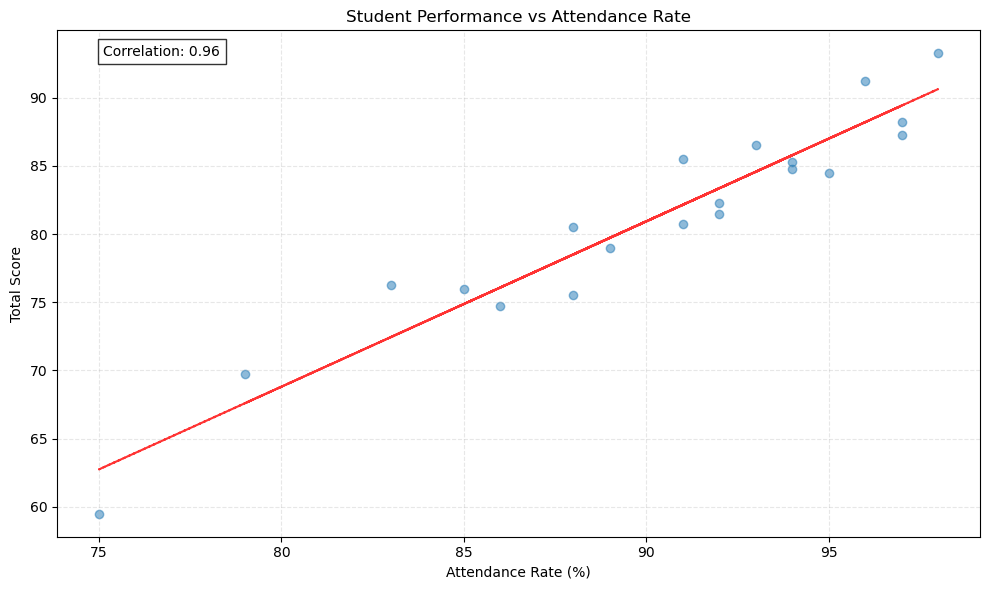

In [13]:
def normalizeScores(students, max_score = 100, target_max = 25):
    """Normalize student scores to a 0-25 scale."""
    for student in students:
        student['english_score'] = (student['english_score'] / max_score) * target_max
        student['history_score'] = (student['history_score'] / max_score) * target_max
        student['math_score'] = (student['math_score'] / max_score) * target_max
        student['science_score'] = (student['science_score'] / max_score) * target_max

        student['total_score'] = student['english_score'] + student['history_score'] + student['math_score'] + student['science_score']
        student['grade'] = mapScoreToGradeLetter(student['total_score'])

    return students

def calculateStatistics(students):
    """Calculate statistical measures for student scores."""
    scores = [student['total_score'] for student in students]
    attendance = [student['attendance_rate'] for student in students]

    stats = {
        'scores': {
            'mean': statistics.mean(scores),
            'median': statistics.median(scores),
            'std_dev': statistics.stdev(scores) if len(scores) > 1 else 0,
            'min': min(scores),
            'max': max(scores)
        },
        'attendance': {
            'mean': statistics.mean(attendance),
            'median': statistics.median(attendance)
        },
    }
    
    return stats

studentsDict = loadStudentData(STUDENT_DATA_FILE)
normalizedScores = normalizeScores(studentsDict)

scores = [student['total_score'] for student in normalizedScores]
attendance = [student['attendance_rate'] for student in normalizedScores]

# stats = calculateStatistics(normalizedScores)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(attendance, scores, alpha=0.5)

# Add trend line
z = np.polyfit(attendance, scores, 1)
p = np.poly1d(z)
plt.plot(attendance, p(attendance), "r--", alpha=0.8)

# Customize the axes
plt.xlabel('Attendance Rate (%)')
plt.ylabel('Total Score')
plt.grid(True, linestyle='--', alpha=0.3)

# Add title
plt.title('Student Performance vs Attendance Rate')

# Add text box with correlation coefficient
correlation = np.corrcoef(attendance, scores)[0,1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()